In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv('wood_removal_cubic_meters.csv')
df.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,2160000.0,2210000.0,2290000.0,2400000.0,2510000.0,2610000.0,2720000.0,2810000.0,2880000.0,...,3110000.0,3150000.0,3190000.0,3230000.0,3260000.0,3290000.0,3320000.0,3360000.0,3400000.0,3400000.0
1,Albania,2080000.0,2560000.0,2560000.0,595000.0,409000.0,409000.0,409000.0,409000.0,27700.0,...,305000.0,296000.0,296000.0,296000.0,296000.0,430000.0,430000.0,430000.0,430000.0,430000.0
2,Algeria,124000.0,172000.0,139000.0,239000.0,166000.0,194000.0,190000.0,203000.0,222000.0,...,121000.0,164000.0,184000.0,141000.0,141000.0,152000.0,121000.0,139000.0,135000.0,119000.0
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Angola,3190000.0,3280000.0,3380000.0,3670000.0,3750000.0,3780000.0,3840000.0,3930000.0,4050000.0,...,4420000.0,4500000.0,4580000.0,4670000.0,4750000.0,4840000.0,4920000.0,5010000.0,5110000.0,5200000.0


In [3]:
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1990,2.16e+06,2.08e+06,124000,0,3.19e+06,1.02e+07,NaN,2.08e+07,1.57e+07,NaN,...,6.35e+06,5.09e+08,3.91e+06,NaN,63200,NaN,3.12e+07,173000,7.12e+06,6.9e+06
1991,2.21e+06,2.56e+06,172000,0,3.28e+06,1.04e+07,NaN,2.04e+07,1.15e+07,NaN,...,6.37e+06,4.91e+08,4.02e+06,NaN,63200,NaN,3.16e+07,187000,7.32e+06,6.97e+06
1992,2.29e+06,2.56e+06,139000,0,3.38e+06,1.17e+07,NaN,2.07e+07,1.22e+07,NaN,...,6.41e+06,4.84e+08,4.2e+06,NaN,63200,NaN,3.12e+07,203000,7.52e+06,6.98e+06
1993,2.4e+06,595000,239000,0,3.67e+06,1.03e+07,NaN,2.19e+07,1.23e+07,NaN,...,6.71e+06,4.71e+08,4.42e+06,NaN,63200,NaN,3.12e+07,216000,7.73e+06,7e+06


In [4]:
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1990,2.16e+06,2.08e+06,124000,0,3.19e+06,1.02e+07,NaN,2.08e+07,1.57e+07,NaN,...,6.35e+06,5.09e+08,3.91e+06,NaN,63200,NaN,3.12e+07,173000,7.12e+06,6.9e+06
1991,2.21e+06,2.56e+06,172000,0,3.28e+06,1.04e+07,NaN,2.04e+07,1.15e+07,NaN,...,6.37e+06,4.91e+08,4.02e+06,NaN,63200,NaN,3.16e+07,187000,7.32e+06,6.97e+06
1992,2.29e+06,2.56e+06,139000,0,3.38e+06,1.17e+07,NaN,2.07e+07,1.22e+07,NaN,...,6.41e+06,4.84e+08,4.2e+06,NaN,63200,NaN,3.12e+07,203000,7.52e+06,6.98e+06
1993,2.4e+06,595000,239000,0,3.67e+06,1.03e+07,NaN,2.19e+07,1.23e+07,NaN,...,6.71e+06,4.71e+08,4.42e+06,NaN,63200,NaN,3.12e+07,216000,7.73e+06,7e+06
1994,2.51e+06,409000,166000,0,3.75e+06,1.08e+07,NaN,2.33e+07,1.44e+07,NaN,...,7.92e+06,4.73e+08,4.48e+06,NaN,63200,NaN,3.12e+07,233000,8.11e+06,8.14e+06


In [5]:
df = df.reset_index()
df.rename(index=str, columns={'index':'datetime'},inplace=True)

df.head()

country,datetime,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1990,2.16e+06,2.08e+06,124000,0,3.19e+06,1.02e+07,NaN,2.08e+07,1.57e+07,...,6.35e+06,5.09e+08,3.91e+06,NaN,63200,NaN,3.12e+07,173000,7.12e+06,6.9e+06
1,1991,2.21e+06,2.56e+06,172000,0,3.28e+06,1.04e+07,NaN,2.04e+07,1.15e+07,...,6.37e+06,4.91e+08,4.02e+06,NaN,63200,NaN,3.16e+07,187000,7.32e+06,6.97e+06
2,1992,2.29e+06,2.56e+06,139000,0,3.38e+06,1.17e+07,NaN,2.07e+07,1.22e+07,...,6.41e+06,4.84e+08,4.2e+06,NaN,63200,NaN,3.12e+07,203000,7.52e+06,6.98e+06
3,1993,2.4e+06,595000,239000,0,3.67e+06,1.03e+07,NaN,2.19e+07,1.23e+07,...,6.71e+06,4.71e+08,4.42e+06,NaN,63200,NaN,3.12e+07,216000,7.73e+06,7e+06
4,1994,2.51e+06,409000,166000,0,3.75e+06,1.08e+07,NaN,2.33e+07,1.44e+07,...,7.92e+06,4.73e+08,4.48e+06,NaN,63200,NaN,3.12e+07,233000,8.11e+06,8.14e+06


In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

df = df.set_index('datetime')

df.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
datetime,,,,,,,,,,,,,,,,,,,,,
1990-01-01,2.16e+06,2.08e+06,124000,0,3.19e+06,1.02e+07,NaN,2.08e+07,1.57e+07,NaN,...,6.35e+06,5.09e+08,3.91e+06,NaN,63200,NaN,3.12e+07,173000,7.12e+06,6.9e+06
1991-01-01,2.21e+06,2.56e+06,172000,0,3.28e+06,1.04e+07,NaN,2.04e+07,1.15e+07,NaN,...,6.37e+06,4.91e+08,4.02e+06,NaN,63200,NaN,3.16e+07,187000,7.32e+06,6.97e+06
1992-01-01,2.29e+06,2.56e+06,139000,0,3.38e+06,1.17e+07,NaN,2.07e+07,1.22e+07,NaN,...,6.41e+06,4.84e+08,4.2e+06,NaN,63200,NaN,3.12e+07,203000,7.52e+06,6.98e+06
1993-01-01,2.4e+06,595000,239000,0,3.67e+06,1.03e+07,NaN,2.19e+07,1.23e+07,NaN,...,6.71e+06,4.71e+08,4.42e+06,NaN,63200,NaN,3.12e+07,216000,7.73e+06,7e+06
1994-01-01,2.51e+06,409000,166000,0,3.75e+06,1.08e+07,NaN,2.33e+07,1.44e+07,NaN,...,7.92e+06,4.73e+08,4.48e+06,NaN,63200,NaN,3.12e+07,233000,8.11e+06,8.14e+06


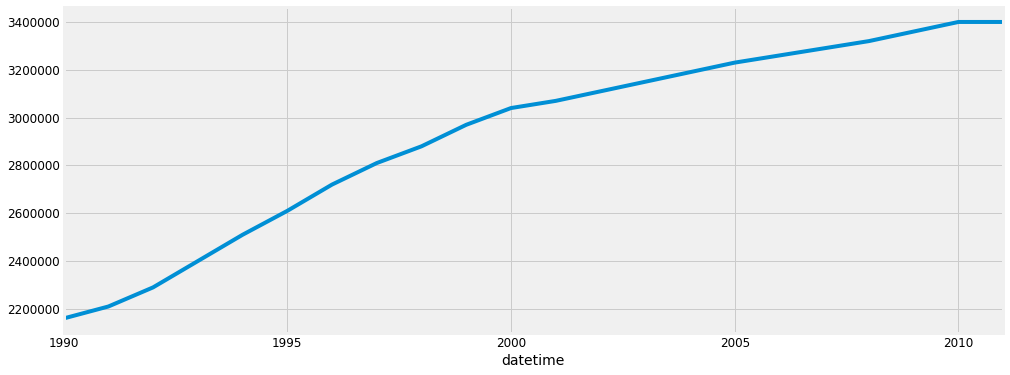

In [7]:
df['Afghanistan'].plot(figsize=(15,6));

In [44]:
df_pop = pd.read_csv('population_dnesity.csv', error_bad_lines=False)
df_env = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding = "ISO-8859-1")
df_lan = pd.read_csv('land_use_over_the_long_term_ourworldindata.csv')


df_pop.shape, df_env.shape, df_lan.shape

((264, 64), (9248, 65), (1036, 6))

In [45]:
df_pop = df_pop.T

In [46]:
df_pop.drop(df_pop.index[[1,2,3,4]], inplace=True)

new_header = df_pop.iloc[0]
df_pop = df_pop[1:]
df_pop.columns = new_header
df_pop.head()

df_pop = df_pop.reset_index()
df_pop.rename(index=str, columns={'index':'datetime'},inplace=True)

df_pop['datetime']
df_pop = df_pop.set_index('datetime')



df_pop.head()

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
datetime,,,,,,,,,,,,,,,,,,,,,
1961,307.989,14.0409,4.6146,60.5766,30.5851,8.45934,1.42323,7.65636,68.1943,102.43,...,98,103.434,5.39073,24.1364,39.618,88.7297,9.96364,14.7727,4.22425,10.0058
1962,312.361,14.3153,4.70527,62.4569,32.7021,8.69411,1.58367,7.77862,70.584,105.585,...,100,106.56,5.56259,24.5538,40.9145,91.3016,10.1366,15.1692,4.3592,10.3384
1963,314.972,14.6034,4.797,64.3292,34.9191,8.93699,1.76804,7.90073,72.9742,109.41,...,113.714,109.749,5.73946,25.0664,42.2477,93.8734,10.3151,15.5794,4.49985,10.6831
1964,316.844,14.9057,4.88756,66.2093,37.1681,9.18876,1.95056,8.02207,75.3424,113.49,...,116.571,113.002,5.91723,25.5822,43.588,96.4453,10.4993,16.0029,4.64486,11.0375
1965,318.667,15.2229,4.97578,68.0581,39.466,9.45,2.11718,8.14246,77.6718,117.6,...,124.286,116.317,6.09426,26.109,44.9004,99.0172,10.6893,16.4393,4.79346,11.4003


(59, 264)

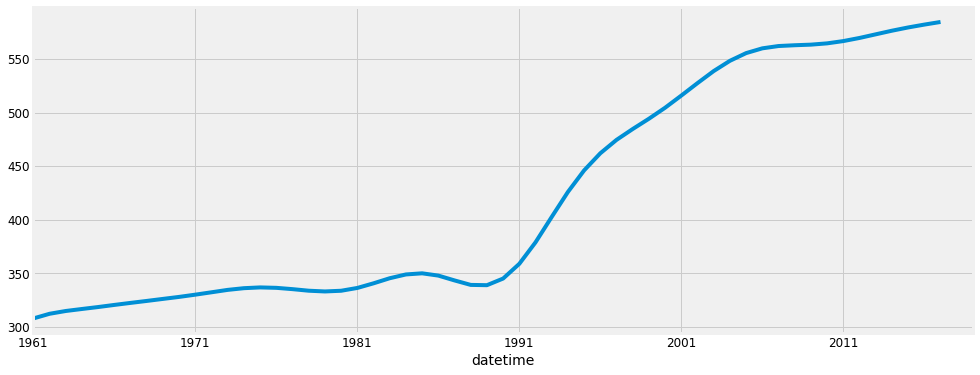

In [49]:
df_pop['Aruba'].plot(figsize=(15,6));
df_pop.shape

In [52]:
df_lan.head()

,Entity,Code,Year,Built-up Area (hectares),Grazing (hectares),Cropland (hectares)
0,Africa,NaN,-10000,1,0.0,0.000
1,Africa,NaN,-9000,2,0.0,0.000
2,Africa,NaN,-8000,4,0.0,0.000
3,Africa,NaN,-7000,7,0.0,7711.773
4,Africa,NaN,-6000,14,0.0,164918.400


In [91]:
df_dis = pd.read_csv('natural-disasters-by-type.csv')
df_air = pd.read_csv('PM25-air-pollution_ourworldindata.csv')
df_carb = pd.read_csv('SYB60_T25_Carbon Dioxide Emission Estimates.csv')
df_for = pd.read_csv('forest-area-as-share-of-land-area_ourworldindata_ByCountry.csv')

df_dis.shape, df_air.shape, df_carb.shape, df_for.shape

((828, 4), (2640, 4), (3309, 7), (1335, 4))

In [74]:
# Wont be using df_dis due to data not being complete
df_dis.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [79]:
df_air.head(12)

,Entity,Code,Year,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (micrograms per cubic meter)"
0,Afghanistan,AFG,1990,60.936690
1,Afghanistan,AFG,1995,56.136628
2,Afghanistan,AFG,2000,56.092028
3,Afghanistan,AFG,2005,43.234032
4,Afghanistan,AFG,2010,46.536809
5,Afghanistan,AFG,2011,50.483960
6,Afghanistan,AFG,2012,50.653945
7,Afghanistan,AFG,2013,50.968831
8,Afghanistan,AFG,2014,49.036091
9,Afghanistan,AFG,2015,62.080234


In [92]:
air = 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (micrograms per cubic meter)'

years = {'Entity':df_air.loc[df_air['Year']==1990].Entity.values, '1990': df_air.loc[df_air['Year'] == 1990][air].values,
        '1995': df_air.loc[df_air['Year'] == 1995][air].values, '2000': df_air.loc[df_air['Year'] == 2000][air].values,
        '2005': df_air.loc[df_air['Year'] == 2005][air].values,'2010': df_air.loc[df_air['Year'] == 2010][air].values,
        '2011': df_air.loc[df_air['Year'] == 2011][air].values,'2012': df_air.loc[df_air['Year'] == 2012][air].values,
        '2013': df_air.loc[df_air['Year'] == 2013][air].values,'2014': df_air.loc[df_air['Year'] == 2014][air].values,
        '2015': df_air.loc[df_air['Year'] == 2015][air].values,'2016': df_air.loc[df_air['Year'] == 2016][air].values}

df_air2 = pd.DataFrame(years)
df_air2.head()

,Entity,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,60.936690,56.136628,56.092028,43.234032,46.536809,50.483960,50.653945,50.968831,49.036091,62.080234,62.854857
1,Albania,17.796006,15.072604,14.320845,12.155814,15.335690,14.646135,14.562992,15.635917,16.748862,14.736548,14.634008
2,Algeria,34.023754,33.398080,32.211591,28.434431,26.709349,27.497075,28.209439,31.009854,33.080627,37.035728,37.230956
3,American Samoa,4.310769,4.295557,4.344943,4.303133,3.368691,3.255184,3.377271,3.457885,3.634140,3.790379,3.763412
4,Andorra,11.576245,11.363996,11.059773,11.219134,11.115808,11.230666,11.254432,10.942684,10.667695,10.908934,10.879472


In [93]:
df_air2 = df_air2.T

In [94]:
# Making header countries, which was on the first row
new_header = df_air2.iloc[0]
df_air2 = df_air2[1:]
df_air2.columns = new_header
df_air2.head()

# Making the index the datetime
df_air2 = df_air2.reset_index()
df_air2.rename(index=str, columns={'index':'datetime'},inplace=True)
df_air2 = df_air2.set_index('datetime')



df_air2.head()

Entity,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Upper middle income,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,World,Yemen,Zambia,Zimbabwe
datetime,,,,,,,,,,,,,,,,,,,,,
1990,60.9367,17.796,34.0238,4.31077,11.5762,36.8148,17.2755,53.1923,15.9126,20.7322,...,38.8764,13.0372,50.8619,10.1443,32.4139,26.78,39.5769,53.6357,32.4448,26.2731
1995,56.1366,15.0726,33.3981,4.29556,11.364,36.3457,17.384,51.8249,16.0588,17.1329,...,38.8059,13.0942,43.0825,10.3696,29.0423,26.9356,39.5107,53.2607,30.6239,24.8185
2000,56.092,14.3208,32.2116,4.34494,11.0598,39.7048,17.2612,52.904,15.6036,18.5639,...,40.1337,13.3398,40.1908,10.3111,32.5724,27.0897,40.4752,54.4871,30.8609,25.0885
2005,43.234,12.1558,28.4344,4.30313,11.2191,35.4045,16.3213,52.763,14.8203,21.3094,...,42.2098,11.9307,32.7738,11.253,28.8703,29.2276,41.8036,43.1276,28.237,25.4232
2010,46.5368,15.3357,26.7093,3.36869,11.1158,30.9217,13.3742,63.7917,14.2242,25.7208,...,42.7667,11.8024,37.1824,7.68692,22.7034,26.7607,41.8582,50.5285,26.4276,22.4804


In [95]:
df_air2.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       ...
       'Upper middle income', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Entity', length=240)

In [112]:
#df_carb = df_carb[1:]
df_carb = df_carb[df_carb['Unnamed: 3'] == 'Emissions (thousand metric tons of carbon dioxide)']

In [122]:
col = 'Unnamed: 4'

years_carb = {'Countries':df_carb.loc[df_carb['Unnamed: 2']=='1975']['CO2 emission estimates'].values, '1975': df_carb.loc[df_carb['Unnamed: 2'] == '1975'][col].values,
        '1985': df_carb.loc[df_carb['Unnamed: 2'] == '1985'][col].values, '1995': df_carb.loc[df_carb['Unnamed: 2'] == '1995'][col].values,
        '2005': df_carb.loc[df_carb['Unnamed: 2'] == '2005'][col].values,'2010': df_carb.loc[df_carb['Unnamed: 2'] == '2010'][col].values,
        '2012': df_carb.loc[df_carb['Unnamed: 2'] == '2012'][col].values,'2013': df_carb.loc[df_carb['Unnamed: 2'] == '2013'][col].values,
        '2014': df_carb.loc[df_carb['Unnamed: 2'] == '2014'][col].values}

df_carb2 = pd.DataFrame(years_carb)

df_carb2.head()

ValueError: arrays must all be same length

In [127]:
df_carb.loc[df_carb['Unnamed: 2']=='1975'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '1985'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '1995'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '2005'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '2010'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '2012'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '2013'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '2014'].shape



((175, 7),
 (177, 7),
 (213, 7),
 (215, 7),
 (217, 7),
 (220, 7),
 (220, 7),
 (220, 7))

In [ ]:
(df_carb.loc[df_carb['Unnamed: 2'] == '1995'].values, 